## Séries temporais

### Remover avisos

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Introdução

#### Retornar tipo de dados de cada coluna do dataframe

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime

base = pd.read_csv('Series temporais/Dados/AirPassengers.csv')

print(base.dtypes)

Month          object
#Passengers     int64
dtype: object


#### Importar base indexando um campo de data

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('Series temporais/Dados/AirPassengers.csv', parse_dates = ['Month'],
                   index_col = 'Month', date_parser = dateparse)

display(base.head(5).index)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

#### Criar base para series temporais

In [4]:
ts = base['#Passengers']

#### Verificar indexadores de Pandas Series

In [5]:
display(ts[1],
        ts['1949-02'],
        ts[datetime(1949,2,1)],
        ts['1950-01-01':'1950-07-31'],
        ts[:'1950-07-31'],
        ts['1950'],
        ts.index.max(),
        ts.index.min())

118

Month
1949-02-01    118
Name: #Passengers, dtype: int64

118

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

Timestamp('1960-12-01 00:00:00')

Timestamp('1949-01-01 00:00:00')

#### Plotar gráfico de séries temporais

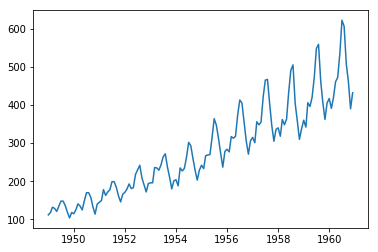

In [6]:
plt.plot(ts)
plt.show()

#### Agrupar por ano

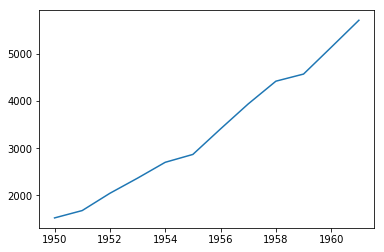

In [7]:
ts_ano = ts.resample('A').sum()

plt.plot(ts_ano)
plt.show()

#### Agrupar por mês

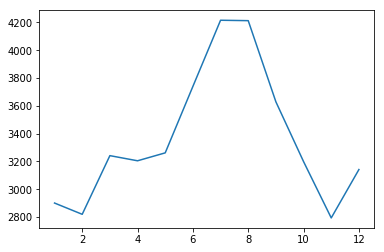

In [8]:
ts_mes = ts.groupby([lambda x: x.month]).sum()

plt.plot(ts_mes)
plt.show()

#### Filtrar o dataframe por um período específico

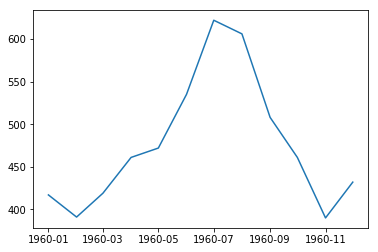

In [9]:
ts_datas = ts['1960-01-01':'1960-12-01']

plt.plot(ts_datas)
plt.show()

### Decomposição

#### Decompor componentes da série temporal

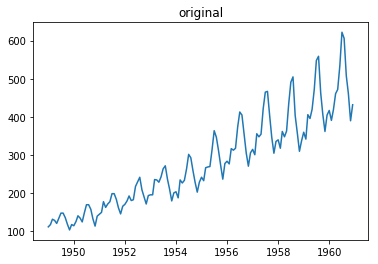

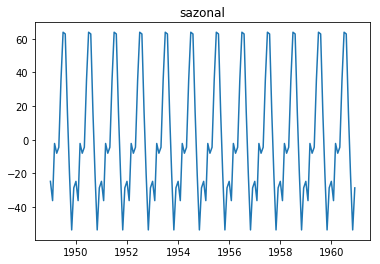

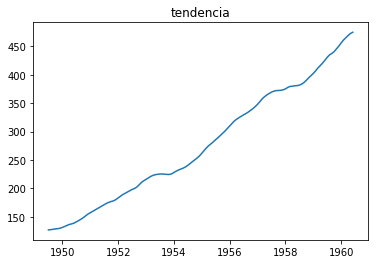

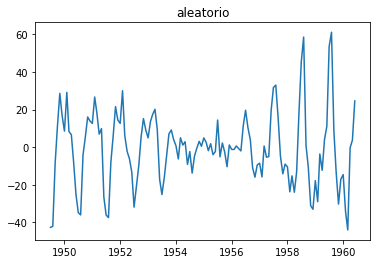

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposicao = seasonal_decompose(ts)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

plt.plot(ts)
plt.title('original')
plt.show()

plt.plot(sazonal)
plt.title('sazonal')
plt.show()

plt.plot(tendencia)
plt.title('tendencia')
plt.show()

plt.plot(aleatorio)
plt.title('aleatorio')
plt.show()

#### Plotar componentes de forma condensada

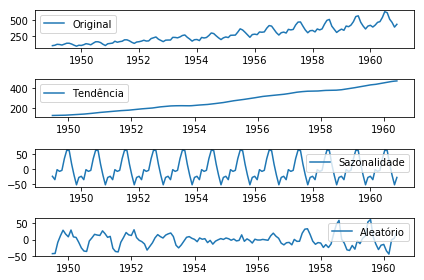

In [11]:
plt.subplot(4, 1, 1) # (qtd, tamanho, posição)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(tendencia, label = 'Tendência')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(sazonal, label = 'Sazonalidade')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(aleatorio, label = 'Aleatório')
plt.legend(loc = 'best')
plt.tight_layout() # para não sobrepor
plt.show()

### Previsões

#### Gerar médias móveis em 12 períodos

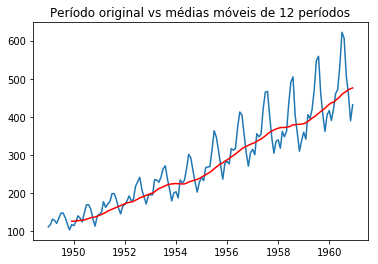

In [12]:
media_movel = ts.rolling(window = 12).mean()

plt.plot(ts)
plt.plot(media_movel, color = 'red')
plt.title('Período original vs médias móveis de 12 períodos')
plt.show()

#### Gerar previsões a partir de médias móveis

In [13]:
previsoes = []
for i in range(1, 13): # média móvel
    superior = len(media_movel) - i
    inferior = superior - 11
    previsoes.append(media_movel[inferior:superior].mean())
    
previsoes = previsoes[::-1] # inverter

display(previsoes)

[405.50757575757575,
 409.90909090909093,
 414.34848484848493,
 418.52272727272725,
 422.75757575757575,
 427.1060606060606,
 431.5,
 436.04545454545456,
 440.49999999999994,
 444.9318181818181,
 449.3787878787878,
 453.52272727272737]

#### Gerar indicadores de modelo preditivo com o método ARIMA

In [14]:
from statsmodels.tsa.arima_model import ARIMA

#p: número dos termos autoregressivos, q: número da média móvel, d: número de diferenças não sazonais
modelo = ARIMA(ts, order=(2, 1, 2))
modelo_treinado = modelo.fit()
display(modelo_treinado.summary())

/Users/igorjuliopimenta/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/igorjuliopimenta/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.714
Date:                Wed, 23 Oct 2019   AIC                           1344.043
Time:                        13:48:30   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5310      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9098      0.065    -29.517      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9997      0.068     14.809      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9552           -0.2965j            1.0002           -0.0479
MA.2            0.9552           +0.2965j            1.0002            0.0479
-----------------------------------------------------------------------------
"""

#### Gerar previsões com o método ARIMA

In [15]:
previsoes = modelo_treinado.forecast(steps = 12)[0]
display(previsoes)

array([433.11994188, 450.89056548, 479.81542997, 511.97727584,
       539.32912253, 555.81173202, 558.75907844, 549.28855275,
       531.66578043, 511.90316729, 496.02832798, 488.5054193 ])

#### Plotar gráfico com previsão de 12 meses

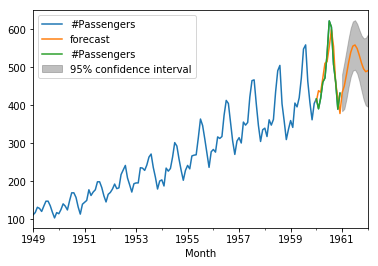

In [16]:
eixo = ts.plot()
modelo_treinado.plot_predict('1960-01-01', '1962-01-01',
                             ax = eixo, plot_insample = True) # ax une dois gráficos, plot_insample = True pinta os dados convergentes
plt.show()

#### Instalar pacote pmdarima e atualizar numpy

In [17]:
! pip install pmdarima

paths = !type -a python
for path in set(paths):
    path = path.split()[-1]
    print(path)
    !{path} -c "import sys; print(sys.path)"
    print()

/Users/igorjuliopimenta/anaconda3/bin/python
['', '/Users/igorjuliopimenta/anaconda3/lib/python37.zip', '/Users/igorjuliopimenta/anaconda3/lib/python3.7', '/Users/igorjuliopimenta/anaconda3/lib/python3.7/lib-dynload', '/Users/igorjuliopimenta/anaconda3/lib/python3.7/site-packages', '/Users/igorjuliopimenta/anaconda3/lib/python3.7/site-packages/aeosa']

/usr/local/bin/python
['', '/usr/local/Cellar/python@2/2.7.16_1/Frameworks/Python.framework/Versions/2.7/lib/python27.zip', '/usr/local/Cellar/python@2/2.7.16_1/Frameworks/Python.framework/Versions/2.7/lib/python2.7', '/usr/local/Cellar/python@2/2.7.16_1/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-darwin', '/usr/local/Cellar/python@2/2.7.16_1/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac', '/usr/local/Cellar/python@2/2.7.16_1/Frameworks/Python.framework/Versions/2.7/lib/python2.7/plat-mac/lib-scriptpackages', '/usr/local/Cellar/python@2/2.7.16_1/Frameworks/Python.framework/Versions/2.7/lib/python2.7/lib-

#### Encontrar os melhores parâmetros para o ARIMA

In [18]:
from pmdarima.arima import auto_arima

modelo_auto = auto_arima(ts, seasonal = True, trace = True)

/Users/igorjuliopimenta/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=1344.044, BIC=1361.821, Fit time=0.279 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1415.278, BIC=1421.203, Fit time=0.008 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1403.473, BIC=1412.361, Fit time=0.035 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1398.827, BIC=1407.716, Fit time=0.059 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=1371.827, BIC=1386.641, Fit time=0.115 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=1360.747, BIC=1381.487, Fit time=0.373 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1361.693, BIC=1376.507, Fit time=0.224 seconds


/Users/igorjuliopimenta/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=1372.181, BIC=1392.921, Fit time=0.346 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1396.121, BIC=1407.972, Fit time=0.092 seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=1347.999, BIC=1371.701, Fit time=0.408 seconds
Total fit time: 1.947 seconds


/Users/igorjuliopimenta/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


#### Verificar os parâmetros encontrados em Model: SARIMAX(p, q, d)

In [19]:
display(modelo_auto.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -666.022
Date:                Wed, 23 Oct 2019   AIC                           1344.044
Time:                        13:48:42   BIC                           1361.821
Sample:                             0   HQIC                          1351.268
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6619      0.193      3.425      0.001       0.283       1.041
ar.L1          1.6479      0.028     58.891      0.000       1.593       1.703
ar.L2         -0.9095      0.025    -36.756      0.000      -0.958      -0.861
ma.L1         -1.9079      0.354     -5.387      0.000      -2.602      -1.214
ma.L2          0.9977      0.370      2.697      0.007       0.273       1.723
sigma2       611.7313    246.316      2.484      0.013     128.961    1094.501
===================================================================================
Ljung-Box (Q):                      358.17   Jarque-Bera (JB):                 2.78
Prob(Q):                              0.00   Prob(JB):                         0.25
Heteroskedasticity (H):               7.02   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Gerar a previsões com o método auto_arima

In [20]:
proximos_12 = modelo_auto.predict(n_periods = 12)
display(proximos_12)

array([434.23180232, 453.11710581, 482.87008982, 515.38471475,
       542.56554612, 558.4449801 , 560.55221484, 550.2434535 ,
       532.00089772, 511.97722426, 496.23463127, 489.16683726])